#### 加载Keras中的MNIST数据集

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

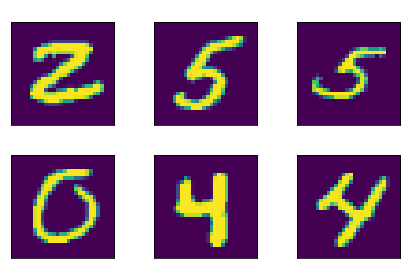

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['text.color'] = 'white'

fig = plt.figure()#生成图框
for i,c in enumerate(np.random.randint(0,1000,6)):#随机取0，1000里的6张图片
    plt.subplot(2,3,i+1) #i+1表示当前图片摆放位置，位置从1开始（故i要加1）
    plt.tight_layout()#自动调整间距
    plt.imshow(train_images[c], interpolation='none')#加灰度
    plt.title("标签: {}".format(train_labels[c]))
    plt.xticks([])#x轴坐标设为空
    plt.yticks([])#y轴坐标设为空
plt.show()

#### 构建神经网络
>神经网络的核心组件就是层(layer)。相当于是过滤器，进去一些数据，出来的数据变得更加有用。大多数深度学习工作涉及将简单的层链接起来，从而实现渐进式的数据蒸馏。深度学习模型就是处理数据筛子，包含了一系列越来越精细的数据过滤器（layer）。


In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    #返回一个由10个概率值（总和为1）组成的数组。每个概率值表示当前图像属于10个数字类别中某一个的概率。
    layers.Dense(10, activation="softmax") 
])

>执行编译步骤的3个参数
- 优化器（optimizer）：基于训练数据自我更新的机制，目的是提高模型的性能。
- 损失函数（loss function）：模型如何衡量在训练数据上的性能，从而引导自己朝正确的方向前进。
- 监控指标（metric）: 训练和测试过程中需要监控的指标


In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

> 图像数据预处理，将其变成模型要求的形状，并缩放所有值都在[0-1]之间。

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [12]:
train_images.shape

(60000, 784)

> 拟合模型，通过调用模型的fit方法来完成。

In [13]:
model.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2570 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1052 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0696 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0375 - accuracy: 0.9888


> 利用模型进行预测

In [15]:
#获取一个待预测的图片
test_digits=test_images[0:1]
#预测
predict_res=model.predict(test_digits)
#预测结果，当前图片对应数字图像类别i的概率
print(predict_res)
#获取概率最大的索引
print(predict_res[0].argmax())
#概率值为
print(predict_res[0][7])
#检查预测图片对应的测试标签是否一致
print(test_labels[0])

[[1.37098777e-08 5.34534882e-11 1.15194425e-05 2.58910412e-04
  1.86768765e-12 1.51868676e-07 9.13204449e-14 9.99726355e-01
  1.05890464e-07 3.05104186e-06]]
7
0.99972636
7


> 评估模型

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9821
test_acc: 0.9821000099182129
